# Population Data¶
A marketing firm wants to launch a promotional campaign in different regions of the country. So, in order to do that, they need to understand which areas they should focus their resources in order to cover the entire region. We are provided with the population data based on different locations along with the demographics. The objective is to segregate the regions into different groups so that the marketing team can plan their resources accordingly. So we have to apply classification techniques in order to segregate the regions into different clusters which will help the marketing team.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Population_Data.csv")

In [3]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [4]:
data.dtypes

Region                object
Office Location Id     int64
Indians               object
Foreigners            object
Indian_Male           object
Indian_Female         object
Foreigners_Male       object
Foreigners_Female     object
Total Population      object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [6]:
#Here we see there are total 38 enteries and each attribute has also 38 non-null values. So there is no missing value.

In [7]:
#Now here we also observe that datatype of every attribute is object except "office location id" but the values are numeric. 
#In order to calculate various values we need them in numeric datatype.

In [8]:
#Let's isolate numeric variables
numeric_attributes = ["Indians","Foreigners",
           "Indian_Male","Indian_Female",
           "Foreigners_Female",
           'Foreigners_Male',"Total Population"]

In [9]:
#I am making a method to remove commas from a string.
def commaremover(n):
    return n.replace(",",'')

In [10]:
for i in numeric_attributes:
    data[i]=data[i].apply(commaremover) #REMOVING COMMAS
    data[i]=data[i].apply(pd.to_numeric) #USING PANDAS' to_numeric attribute to convert the object datatype to numeric.

In [11]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [12]:
data.dtypes

Region                object
Office Location Id     int64
Indians                int64
Foreigners             int64
Indian_Male            int64
Indian_Female          int64
Foreigners_Male        int64
Foreigners_Female      int64
Total Population       int64
dtype: object

In [13]:
#Checking if the values given comply.
data[['Indians','Foreigners']].sum().sum()-data['Total Population'].sum()

0

In [14]:
#Checking if Indians=Indian Males + Indian Females
data[['Indian_Male','Indian_Female']].sum().sum()-data['Indians'].sum()

0

In [15]:
#Checking if Foreigners=Foreigners Male + Female
data[['Foreigners_Male','Foreigners_Female']].sum().sum()-data['Foreigners'].sum()

-112859

In [16]:
#oops!!! It means there is also other group of people have been included in the counting. So let's make another columns for them.
data['Foreigners_Others']=data['Foreigners']-(data['Foreigners_Male']+data['Foreigners_Female'])

In [17]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Foreigners_Others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [18]:
#Checking if Total Population is the sum of all the categories or not.
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female','Foreigners_Others']].sum().sum()-data['Total Population'].sum()

0

In [19]:
#Now we see that total population also satisfies after creating foreigners others group.

In [20]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Foreigners_Others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [21]:
#dropping office location ids and region because they are of no use to us for clustering.
data1 = data.drop(columns = ['Region',"Office Location Id"])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Foreigners_Others
0,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,194379,650744,161803,32576,631660,10652,845123,8432
3,107360,470708,85343,22017,450267,6389,578068,14052
4,55351,329980,31796,23555,325105,3684,385331,1191


In [22]:
#Since the range of the data is very varse, I have to scale them before using K-Means.
#I could use Normalizer for scaling them but here I see that sum of some column is equal to the other column or the values 
#of one are contained in other columns. So for simplicity we can convert these large numbers using ratios(%) 
#so that they all get scaled between 0 and 1. Simple!

In [23]:
def ratio_converter(newdata, total, columns): #It will divide the value by the total value provided by the "total" parameter.
    
    for i in columns:
        newdata[i] = newdata[i]/data['Total Population']
        
    return newdata.drop(columns=['Total Population']) 

data2 = ratio_converter(data1,'Total Population', data1.drop(columns=['Total Population']).columns)

# checking
data2.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_Others
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.013480
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.013681
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.009977
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.024309
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.003091


In [29]:
#Now the question arises how many clusters should I make ?? Well I will use elbow method for that.
from sklearn.cluster import KMeans
InertiaMetric=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data2)
    InertiaMetric.append(kmeans.inertia_)
InertiaMetric

[0.15812407737031617,
 0.057985951972421845,
 0.03612785969749044,
 0.024684541099095618,
 0.01896793569380657,
 0.014757783415246358,
 0.012864611497042874,
 0.010525864761444128,
 0.0085094739987321]

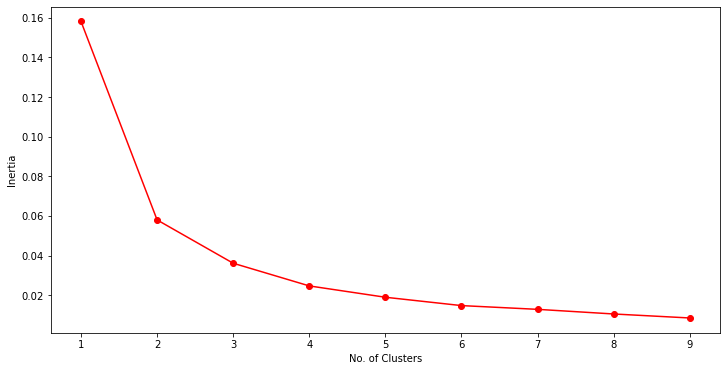

In [30]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),InertiaMetric,color='red',marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

In [31]:
#here by elbow method we can choose 2,3,or 4 as suitable number of clusters but since there are only 38 enteries this data has
#not high computational resources therefore in this scenario I will choose lesser number of clusters i.e 2

In [32]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data2)
predicted=kmeans.predict(data2)
kmeans.inertia_

0.057985951972421845

In [33]:
predicted

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [34]:
#Let's put these predicted cluster in a variable inside the dataset.

In [35]:
data2['Cluster']=predicted
data2.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Foreigners_Others,Cluster
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.013480,1
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.013681,1
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.009977,1
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.024309,1
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.003091,0


In [46]:
def seg(attr1,attr2,clusters):
    x=[]
    y=[]
    for i in range(clusters):
        x.append(data1[attr1][data2['Cluster']==i])
        y.append(data1[attr2][data2['Cluster']==i])
    return x,y
       
def plot_clusters(a,b,clusters):
    plt.figure(figsize = (5,5), dpi = 100)
    x,y=seg(a,b,clusters)
    print(type(x))
    for i in range(clusters):
        plt.scatter(x[i],y[i],label="cluster{}".format(i))
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(str(a+" Vs "+b))
    plt.legend()
    return ''

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

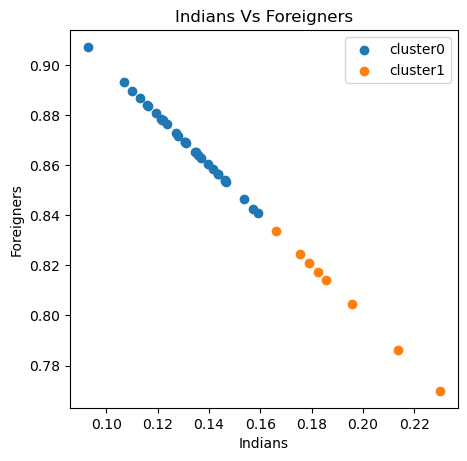

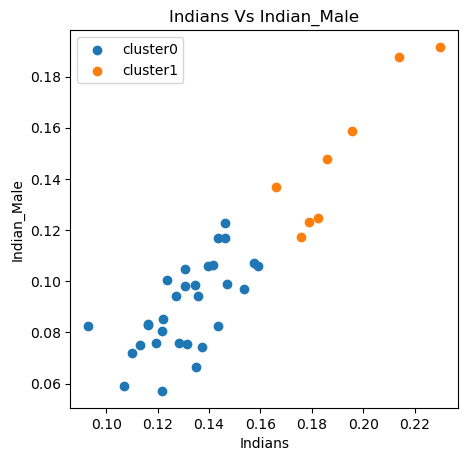

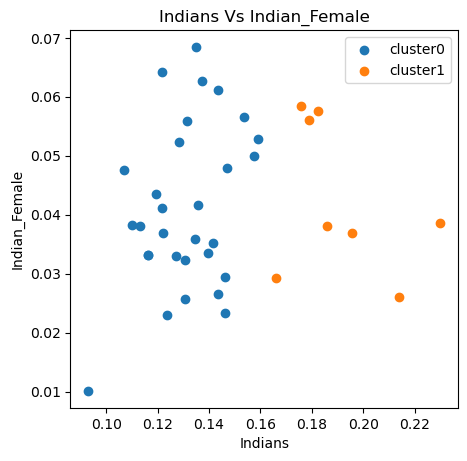

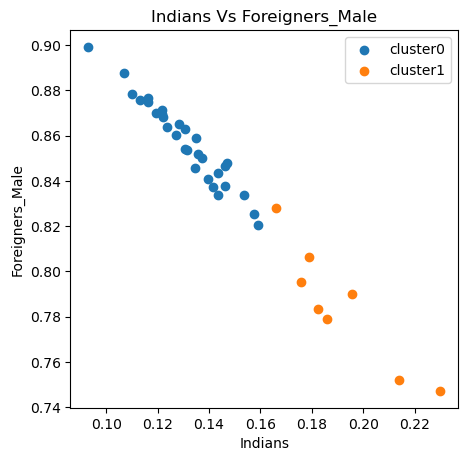

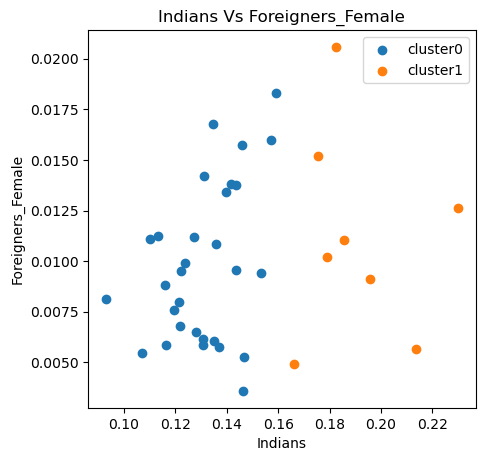

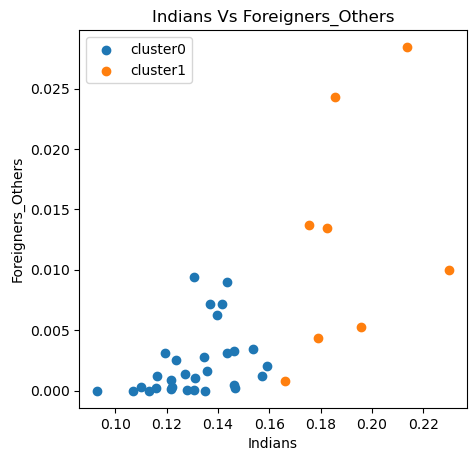

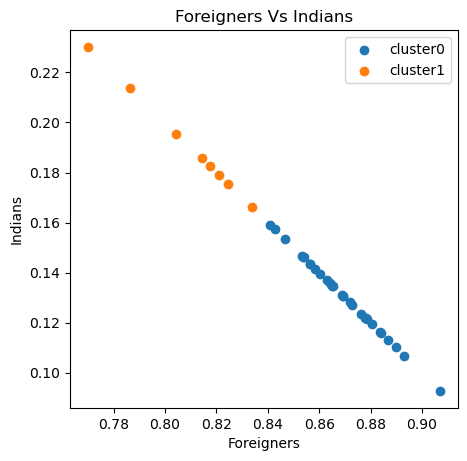

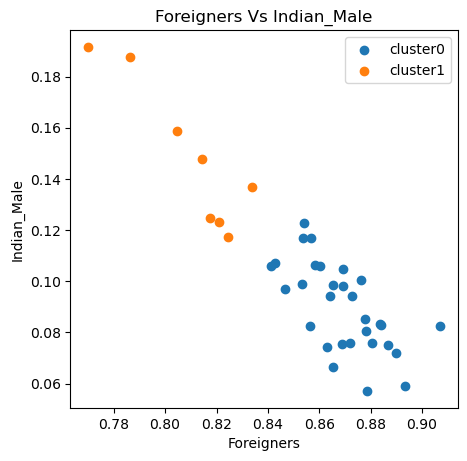

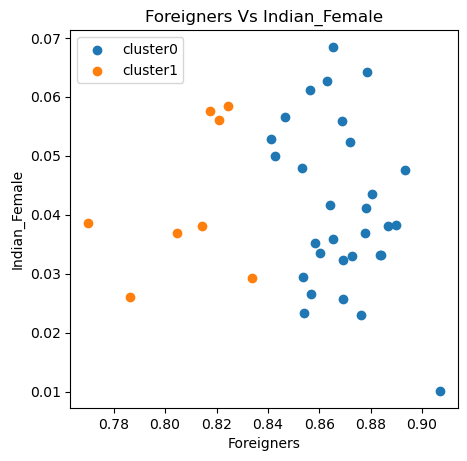

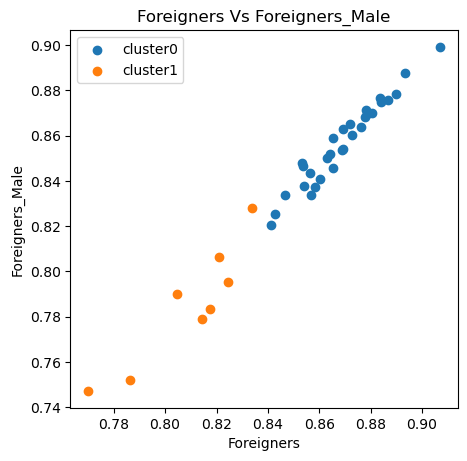

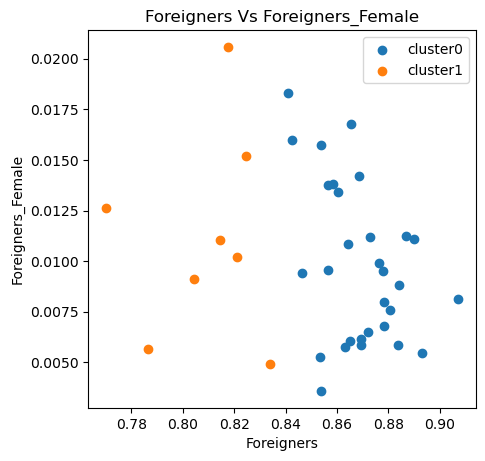

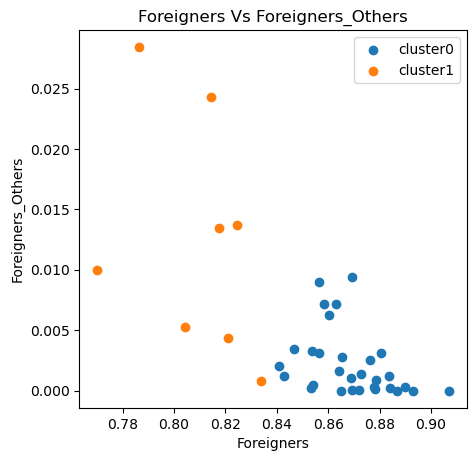

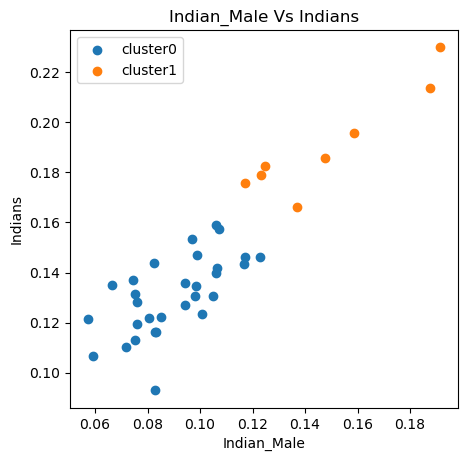

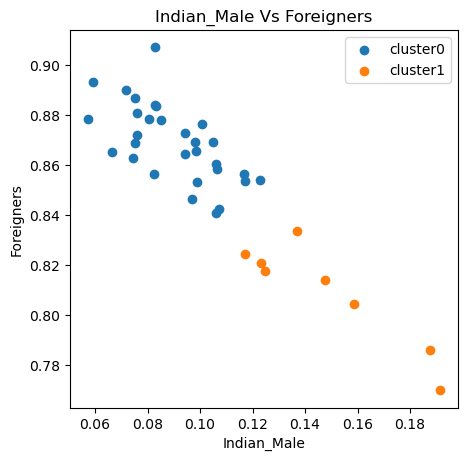

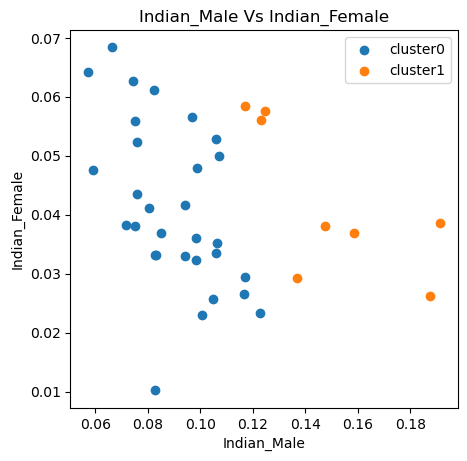

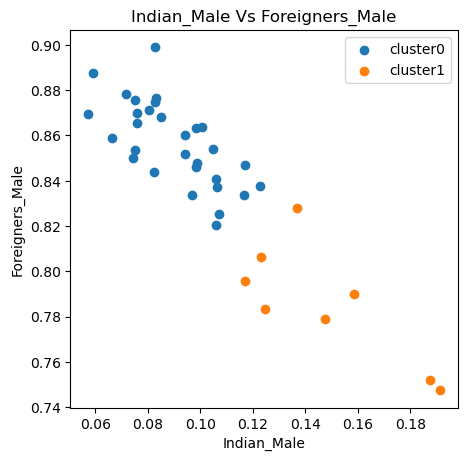

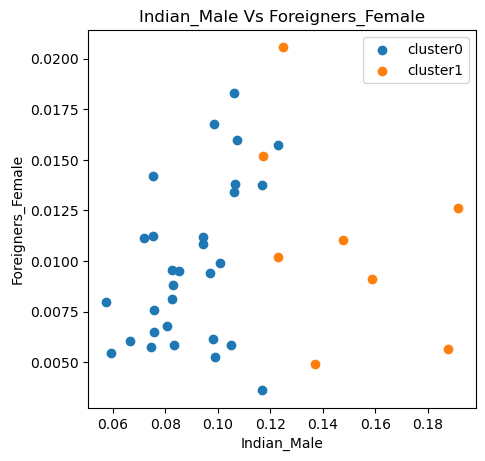

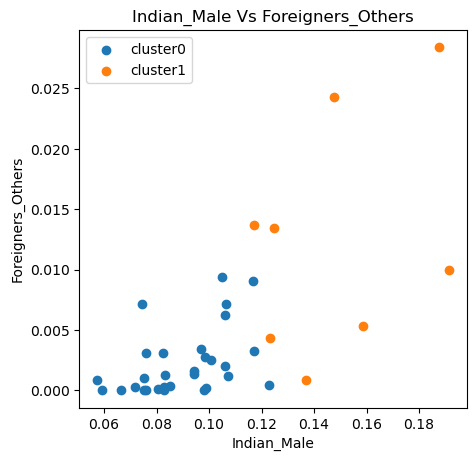

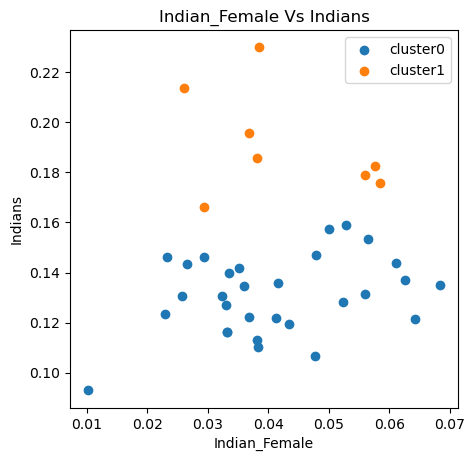

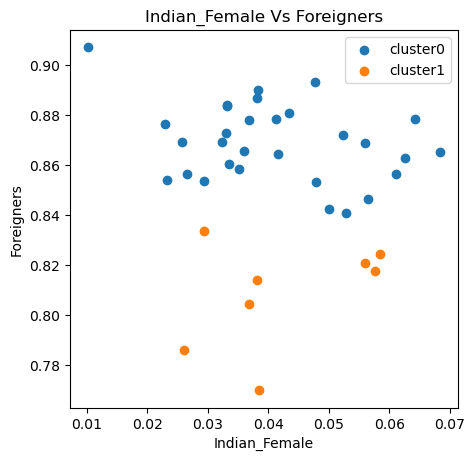

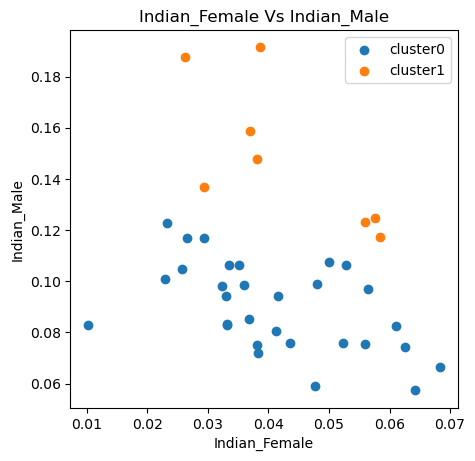

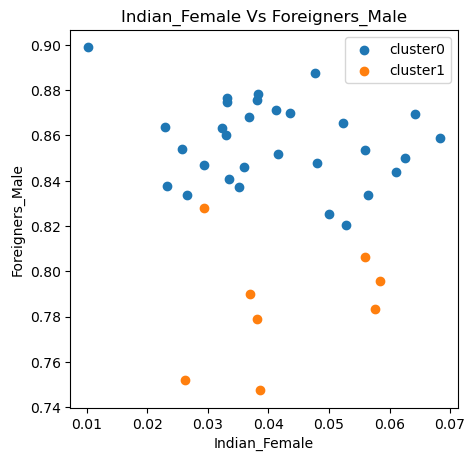

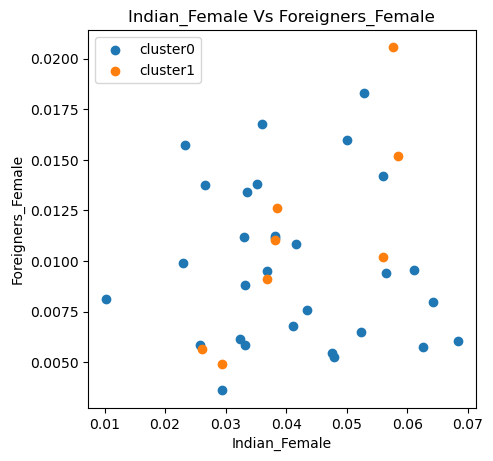

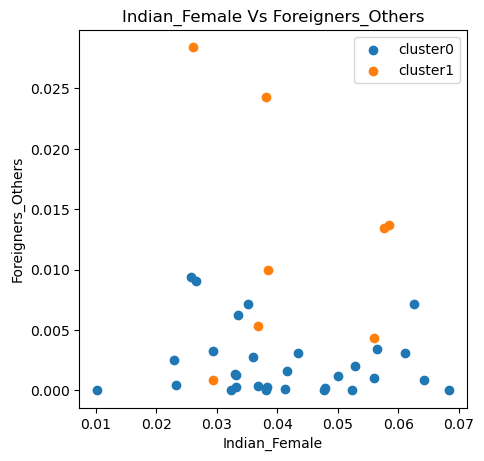

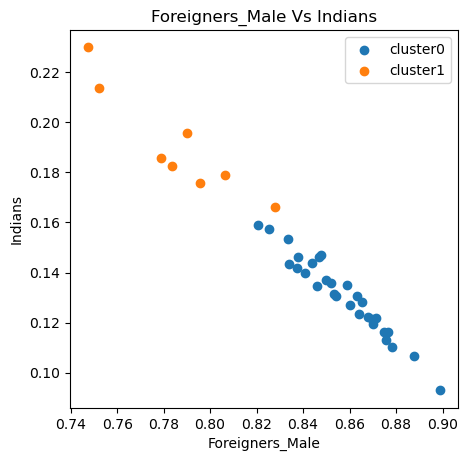

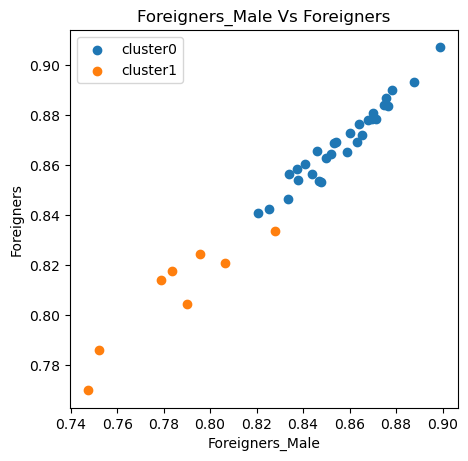

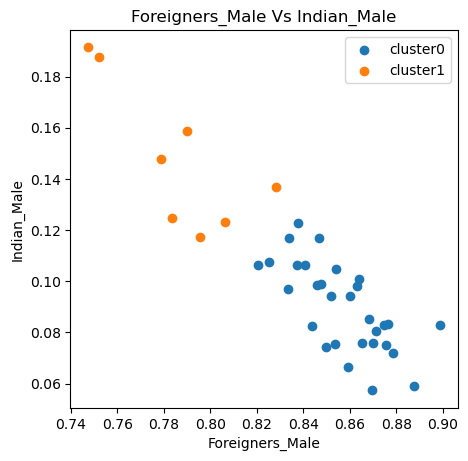

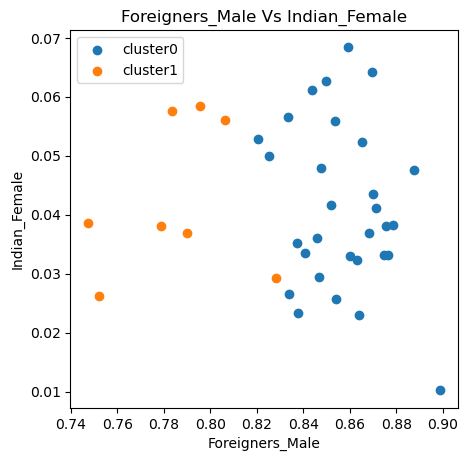

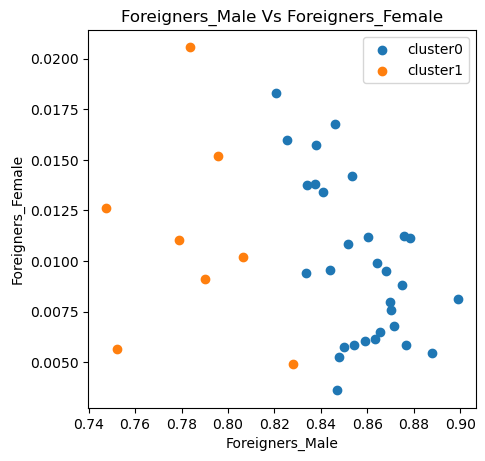

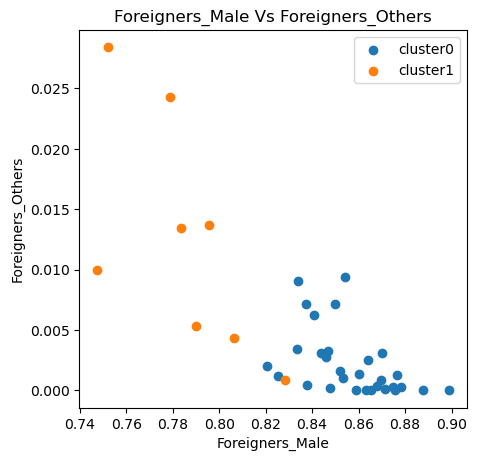

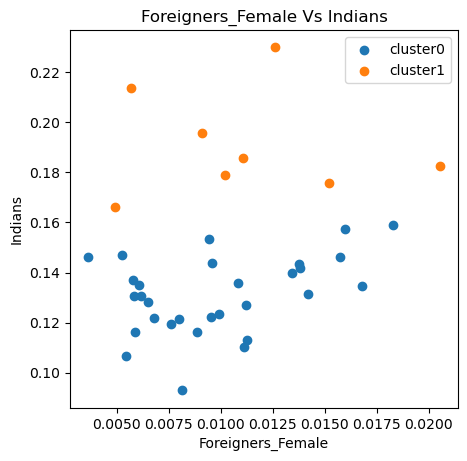

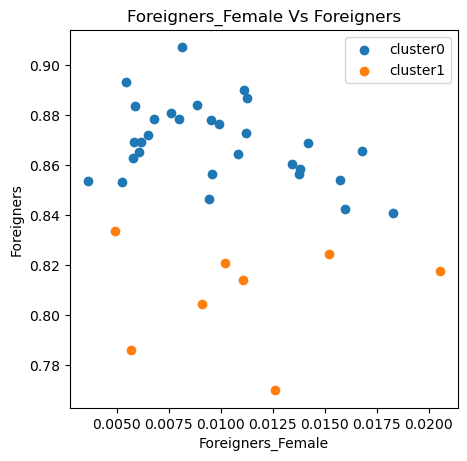

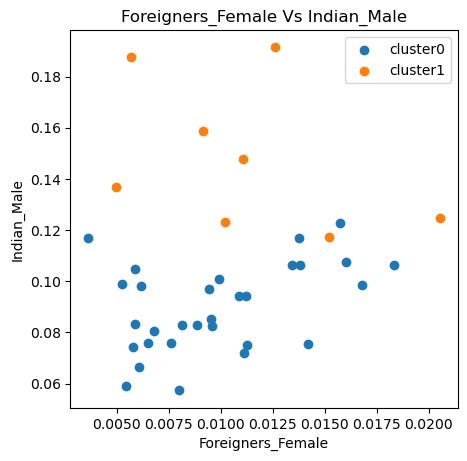

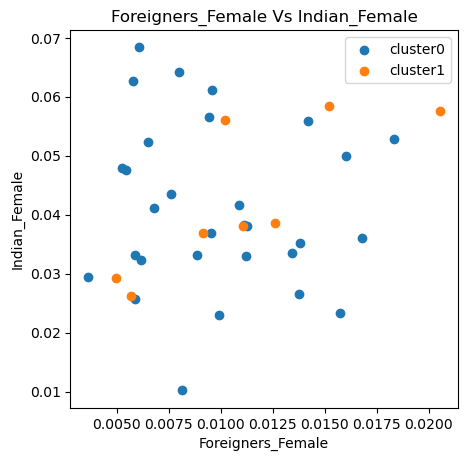

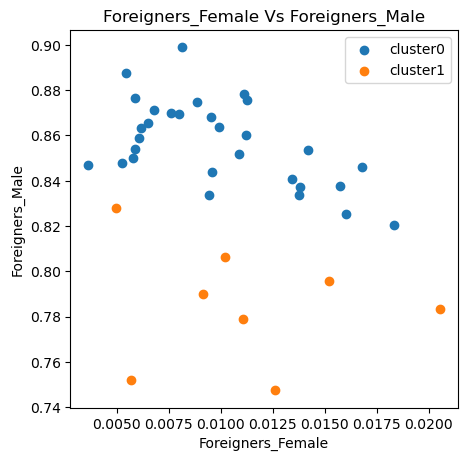

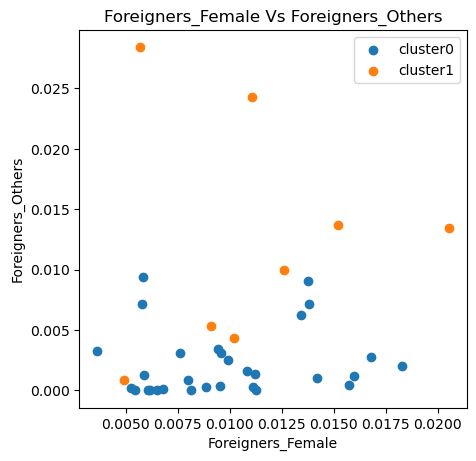

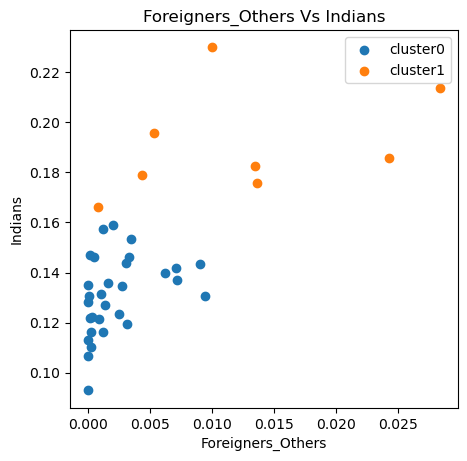

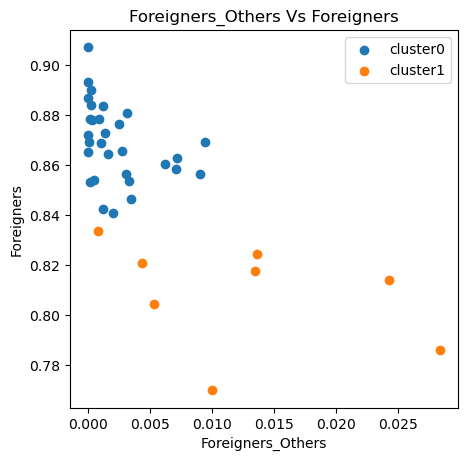

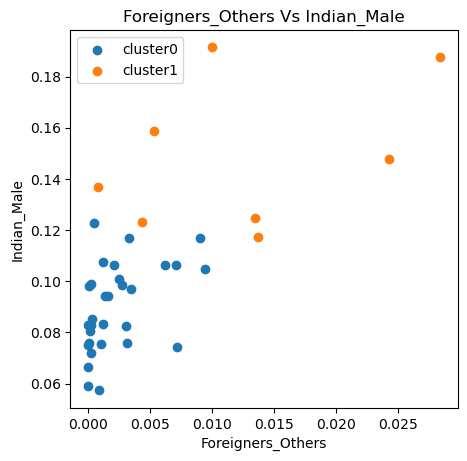

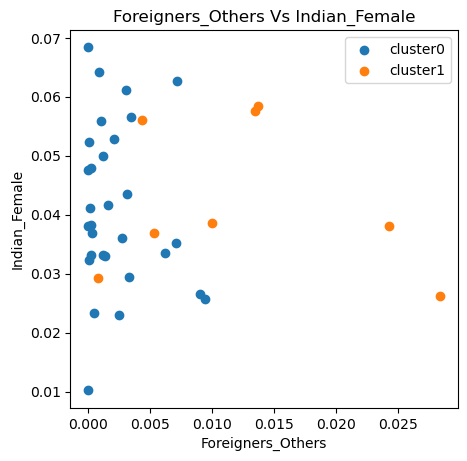

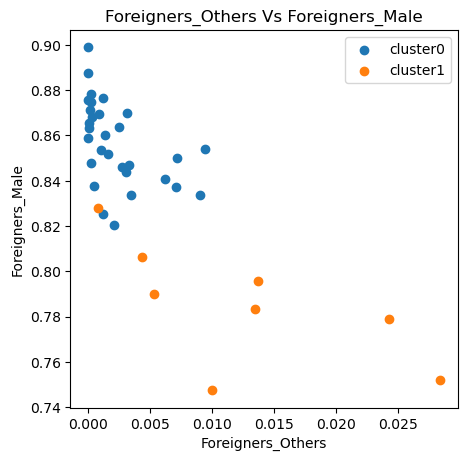

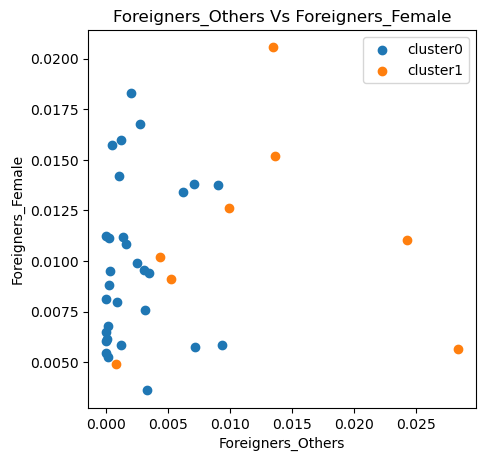

In [47]:
[plot_clusters(x,y,2) for x in data2.drop(columns=['Cluster']).columns for y in data2.drop(columns=['Cluster']).columns if x!=y]

<class 'list'>


''

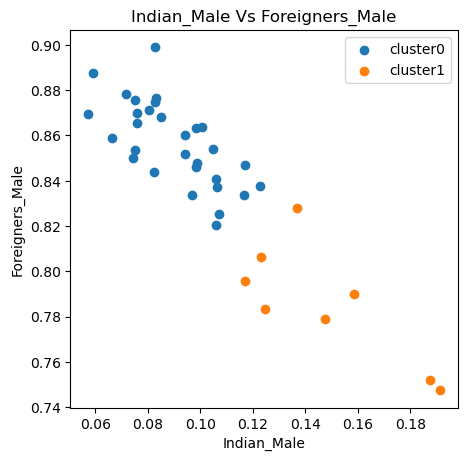

In [48]:
plot_clusters('Indian_Male', 'Foreigners_Male',2)

<class 'list'>


''

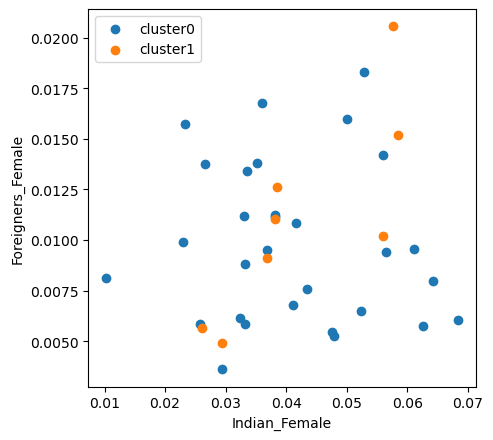

In [45]:
plot_clusters('Indian_Female', 'Foreigners_Female',2)

In [49]:
#Like the above two examples, we can see different groups into 2 clusters and this will help marketing strategy in formulating strategies.
#Thankyou!!!